In [1]:
#IMPORT LIBRARIES
import sys
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt, numpy as np
from scipy.interpolate import spline
from os import path
from itertools import *
from functools import reduce
from __future__ import division

In [2]:
#Input parameters & list/dictionaries initialization:
max_iter = 2 #maximum number of iterations
i = 0 #starting number of iteration
number_of_files = 2 #number of files in directory
width = 2.5 #mm
thickness = 0.042 #mm
area = width * thickness 

sourcePath = 'C:\\Users\\Inance\\Documents\\Thesis\\Experiments\\DMTA_Tests\\strain_sweep_both\\'
list_of_source_files = glob.glob(sourcePath + '/*.TXT')
#outpath = 'C:\\Users\\Inance\\Documents\\Thesis\\BURST\\all_inflation_burst_txt\\CYCLIC\\CYCLIC_FIGURES'

frequency = []
stored_modulus = []
loss_modulus = []
tan_delta = [] 
displacement = []
force = []
stress = []
strainList = []
forceList = []
strainList = np.empty((number_of_files, 0)).tolist() #creates an empty list with a certain number of lists in it.
forceList = np.empty((number_of_files, 0)).tolist() #creates an empty list with a certain number of lists in it.

In [3]:
#Loop through files & save data in list form
def GetSourceFiles(list_of_source_files,i):
    print('GetSourceFiles')
    with open(list_of_source_files[i]) as source_file:
        print("file entered:",i+1)
        lst = [] 
        for line in source_file:
            lst.append([ float(x) for x in line.split()])
        strain = np.array([ x[0] for x in lst]) #hz
        stored_modulus = (np.array([ x[1] for x in lst])) #Pa - E'
        loss_modulus = (np.array([ x[2] for x in lst])) #Pa - E"
        tan_delta = np.array([ x[3] for x in lst]) 
        displacement = np.array([ x[4] for x in lst]) #mm
        force = np.array([ x[5] for x in lst]) #g
        stress = np.array([ x[6] for x in lst]) #Pa
    return strain,force

In [4]:
#Save the pressures in LISTS:
def  SaveInNewList (strain,force,i):
    print('SaveInNEWList')
    strainList[i] = strain
    forceList[i] = force
    return strainList, forceList

In [5]:
#Create Figures
def CreateGraphs(strain_i, force_i,i):
    labels = ['Weft','Warp']
    colours = ['r','g','y']
    print('CreateGraphs')
    axis_font = {'size':'12'} #customize graph
    plt.ylabel("Force (N)",**axis_font),plt.xlabel("% Strain",**axis_font) #name axes
    ax.plot(strain_i, force_i,c=colours[i],marker='.', label=labels[i]) #create a scatter plot
    return

GetSourceFiles
file entered: 1
length of data =  24 24
SaveInNEWList
CreateGraphs
GetSourceFiles
file entered: 2
length of data =  24 24
SaveInNEWList
CreateGraphs


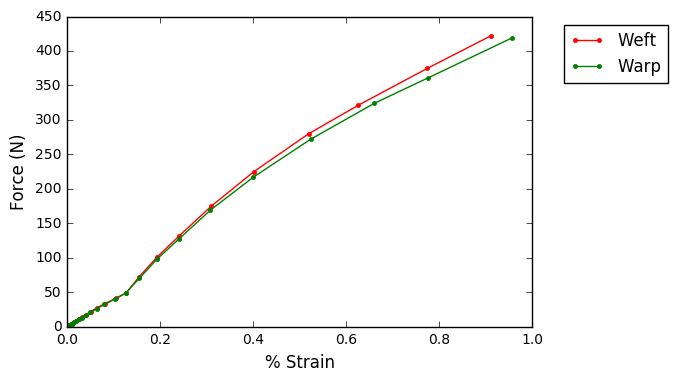

In [6]:
#MAIN!!
fig, ax = plt.subplots()

while (i <= number_of_files and i!=max_iter):
    strain,force = GetSourceFiles(list_of_source_files,i) #return pressure and time from specific file
    print('length of data = ',len(strain),len(force))
    strainList, forceList = SaveInNewList (strain,force,i)
    CreateGraphs(strainList[i], forceList[i],i)
    i+=1 #increment i to loop

leg = ax.legend(loc=2, bbox_to_anchor=(1.05, 1.0))
plt.show() #show graph
#fig.savefig(path.join(outpath,"dataname_{0}.png".format(i)))